In [ ]:
%matplotlib inline

import os
import time
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow.keras as keras
from tensorflow.keras.layers import Dense, Input, Flatten, Conv2D, BatchNormalization, \
                                    Activation, Dropout, MaxPooling2D
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import TensorBoard
from IPython.display import YouTubeVideo
from PIL import Image

In [ ]:
%load_ext tensorboard

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


In [ ]:
from datetime import datetime

In [ ]:
import gzip
import pickle

X, y = pickle.load(gzip.open('/content/flatland_train.data', 'rb'))
y[y != 0] -= 2
X = X.reshape(X.shape[0], 50, 50, 1) / 255.0

In [ ]:
NAME = "model".format(int(time.time()))
model = keras.models.Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), input_shape=[50, 50, 1]))
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(5, activation='softmax'))

model.compile(loss="sparse_categorical_crossentropy",
              optimizer=keras.optimizers.Adam(),
              metrics=["accuracy"])
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_12 (Conv2D)           (None, 48, 48, 32)        320       
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 46, 46, 32)        9248      
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 23, 23, 32)        0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 21, 21, 32)        9248      
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 10, 10, 32)        0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 3200)              0         
_________________________________________________________________
dense_8 (Dense)              (None, 128)              

In [ ]:
loss = model.fit(X, y, epochs=10, batch_size=64, validation_split=0.2)

Epoch 1/10
125/125 [==============================] - 2s 17ms/step - loss: 0.0130 - accuracy: 0.9954 - val_loss: 0.0352 - val_accuracy: 0.9880
Epoch 2/10
125/125 [==============================] - 2s 16ms/step - loss: 0.0120 - accuracy: 0.9961 - val_loss: 0.0243 - val_accuracy: 0.9910
Epoch 3/10
125/125 [==============================] - 2s 16ms/step - loss: 0.0126 - accuracy: 0.9967 - val_loss: 0.0338 - val_accuracy: 0.9875
Epoch 4/10
125/125 [==============================] - 2s 16ms/step - loss: 0.0145 - accuracy: 0.9949 - val_loss: 0.0178 - val_accuracy: 0.9940
Epoch 5/10
125/125 [==============================] - 2s 16ms/step - loss: 0.0100 - accuracy: 0.9971 - val_loss: 0.0249 - val_accuracy: 0.9930
Epoch 6/10
125/125 [==============================] - 2s 16ms/step - loss: 0.0064 - accuracy: 0.9979 - val_loss: 0.0296 - val_accuracy: 0.9905
Epoch 7/10
125/125 [==============================] - 2s 16ms/step - loss: 0.0107 - accuracy: 0.9969 - val_loss: 0.0377 - val_accuracy: 0.9905

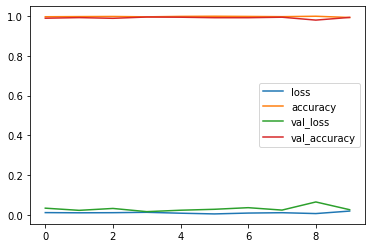

In [ ]:
pd.DataFrame(loss.history).plot()

In [ ]:
pred = model.predict(X).argmax(axis=1)
print('Accuracy on test set - {0:.02%}'.format((pred == y).mean()))

Accuracy on test set - 99.79%


In [ ]:
model.save('model.h5')

In [ ]:
from google.colab import files
files.download('model.h5')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
import gzip
import pickle

def evaluate(path, model):
    X, y = pickle.load(gzip.open(path, 'rb'))
    y[y != 0] -= 2
    X = X / 255.
    acc = np.mean(model(X).numpy().argmax(axis=1) == y)
    return acc

model = keras.models.load_model('model.h5')
evaluate('flatland_train.data', model)